# Analysis of Population of country by Webscraping Worldometer website

# Advance Python Project
## Introduction:
We have data of world population by country by 2022 in worldometer webpage.Our Data contains 235 countries information on populaton(2020) ,Yearly change, Net change, Density(P/Km2),Land Area(Km^2),Migrants(net),Fert.rate,Med.Age,Urban Pop%, Worl share.We have to analyze data after scraping it, and get insights while answering folllowing Questions.

## Objective:
To get insights from population data by answering Questions.
* Please scrape the table properly using BeautifulSoup.
* Once the table is scraped, perform some basic data cleaning steps. 
1. Please report the number of rows and columns
2. Please report if there is any missing value in the dataset. (Do not remove or fill it)
3. Please rename the columns appropriately.
4. Please report the top ten and bottom ten countries based on the density column.
5. Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.
6. Report top 5 largest countries in this word based on land area.
7. Report top 5 countries in this word based on a median value.
8. Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.
9. Please sort the population column based on the lowest populated countries and report the bottom 10 countries as well as the top 10 countries.

## Attributes Explanation:
* **(#)** is for indexing of data,unique number, so it is **nominal** datatype.
* **Country/Dependency** is name of country which is unique without order, so **nominal** datatype.
* **population** is number of persons living in that country, it has finite value,so **discrete integer** datatype.
* **Yearly Change** is percentage of ppopulation changing in one year,it can be continuous, so **float** datatype.
* **Net Change** is how much population chages in one year,it is finite number, so **discrete ineteger** datatype.
* **Density(P/Km^2)** is population living per kilometer in that country,it can contain continuous value, so it is **float** datatype.
* **Land Area(Km^2)** is area of that country,it is measurable, it can contain continuous value, so it is **float** datatype.
* **Migrants(net)** is number population came from other country due to various reasons,it is finite discrete **integer** datatype.
* **Fert.rate** is fertility rate, average of number of children born to woman in her lifetime, which can be continuous, so **float** datatype.
* **Med.Age** is median age is at that point, half of population is younger & half of population is older than that,it can be continuous, so **float** datatype.
* **Urban Pop(%)** is percentage of population living in Urban area of the country, it is continuous value, so **float** datatype.
* **World shape** is share of population of the country among whole world.it can be continuous value, so **float** datatype.

## Data collection:
Data has to collected from worldometer webpage through web scraping using requests & beautiful soup libraries.
As both are seperate package libraries, we need to install them.

In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
# After instaling 2 libraries, we have import them
import requests                  # to get response, it gives hml content
from bs4 import BeautifulSoup    # it parse html content

In [2]:
# it is url of population data, we need to scrape
URL= "https://www.worldometers.info/world-population/population-by-country/"

In [3]:
response = requests.get(URL)    # feed url on get method ib requests library, to get respose
print(response)

<Response [200]>


Here, response is 200, so serever accepted our request.

In [4]:
# parsing html content of webpage with beautifulsoup object
soup = BeautifulSoup(response.content,'html.parser')

In [5]:
title= soup.find('title')
print(title.text)

Population by Country (2022) - Worldometer


This is the title of  webpage of population data.Let us see whole html page using prettify

In [6]:
print(soup.prettify())  # prettify is to give 1st visual rpresentation of webpage

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2022) - Worldometer
  </title>
  <meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" siz

In [7]:
# we have to get table
table = soup.find('table')
print(table.prettify())

<table cellspacing="0" class="table table-striped table-bordered" id="example2" width="100%">
 <thead>
  <tr>
   <th>
    #
   </th>
   <th>
    Country (or dependency)
   </th>
   <th>
    Population
    <br/>
    (2020)
   </th>
   <th>
    Yearly
    <br/>
    Change
   </th>
   <th>
    Net
    <br/>
    Change
   </th>
   <th>
    Density
    <br/>
    (P/Km²)
   </th>
   <th>
    Land Area
    <br/>
    (Km²)
   </th>
   <th>
    Migrants
    <br/>
    (net)
   </th>
   <th>
    Fert.
    <br/>
    Rate
   </th>
   <th>
    Med.
    <br/>
    Age
   </th>
   <th>
    Urban
    <br/>
    Pop %
   </th>
   <th>
    World
    <br/>
    Share
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    1
   </td>
   <td style="font-weight: bold; font-size:15px; text-align:left">
    <a href="/world-population/china-population/">
     China
    </a>
   </td>
   <td style="font-weight: bold;">
    1,439,323,776
   </td>
   <td>
    0.39 %
   </td>
   <td>
    5,540,090
   </td>
   <td>
    1

In [8]:
col=table.find_all('thead')
col

[<thead> <tr> <th>#</th> <th>Country (or dependency)</th> <th>Population<br/> (2020)</th> <th>Yearly<br/> Change</th> <th>Net<br/> Change</th> <th>Density<br/> (P/Km²)</th> <th>Land Area<br/> (Km²)</th> <th>Migrants<br/> (net)</th> <th>Fert.<br/> Rate</th> <th>Med.<br/> Age</th> <th>Urban<br/> Pop %</th> <th>World<br/> Share</th> </tr> </thead>]

In [10]:
import pandas as pd  # import libraries
import numpy as  np

In [11]:
data = pd.DataFrame(columns=['index', 'Country(dependency)',
 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)',
 'Migrants (net)','Fert.Rate', 'Med. Age', 'UrbanPop%', 'World Share'])  # creating dataframe

for row in table.tbody.find_all("tr"):   # for each row
    col = row.find_all('td')             # for each column
    if(col!=[]):                         # column not equal to 0
        id =col[0].text               
        country=col[1].text
        Population=col[2].text
        YearlyChange=col[3].text
        NetChange =col[4].text
        Density=col[5].text
        LandArea=col[6].text
        Migrants=col[7].text
        Fert=col[8].text
        Med=col[9].text
        UrbanPop=col[10].text
        WorldShare=col[11].text
        data=data.append({"index":id, "Country(dependency)":country,"Population (2020)":Population,"Yearly Change":YearlyChange,
                     "Net Change":NetChange,"Density (P/Km²)":Density,"Land Area (Km²)":LandArea,"Migrants (net)":Migrants,
                     "Fert.Rate":Fert,"Med. Age":Med,"UrbanPop%":UrbanPop,"World Share":WorldShare},ignore_index=True)
    
data

,index,Country(dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert.Rate,Med. Age,UrbanPop%,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


We Successfully scrape data and store in pandas dataframe. Lets explore daat, clean data & some analysis.

In [12]:
data.columns   # find column names

Index(['index', 'Country(dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert.Rate', 'Med. Age', 'UrbanPop%', 'World Share'],
      dtype='object')

## Please report the number of rows and columns

In [14]:
data.shape  # number of rows & columns

(235, 12)

Here we have 235 rows with 12 columns.

In [15]:
data.duplicated().sum()  # to check duplicates of data

0

In our data, we dont have duplicates.
lets check missing values

In [16]:
data.isnull().sum()  # null values

index                  0
Country(dependency)    0
Population (2020)      0
Yearly Change          0
Net Change             0
Density (P/Km²)        0
Land Area (Km²)        0
Migrants (net)         0
Fert.Rate              0
Med. Age               0
UrbanPop%              0
World Share            0
dtype: int64

It is not considering empty spaces,0 as null, so we have 0 ull values.Lets check data types of columns of data.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                235 non-null    object
 1   Country(dependency)  235 non-null    object
 2   Population (2020)    235 non-null    object
 3   Yearly Change        235 non-null    object
 4   Net Change           235 non-null    object
 5   Density (P/Km²)      235 non-null    object
 6   Land Area (Km²)      235 non-null    object
 7   Migrants (net)       235 non-null    object
 8   Fert.Rate            235 non-null    object
 9   Med. Age             235 non-null    object
 10  UrbanPop%            235 non-null    object
 11  World Share          235 non-null    object
dtypes: object(12)
memory usage: 22.2+ KB


All columns shows object data type, which is wrong, so we have to convert datatype.index,populaton,net change,migrants to integer.Yearly change,density ,land area,fert.rate,med.age, urban%,worldshare to float.

In [18]:
data.nunique()   # to find number of unique values

index                  235
Country(dependency)    235
Population (2020)      235
Yearly Change          174
Net Change             234
Density (P/Km²)        165
Land Area (Km²)        226
Migrants (net)         159
Fert.Rate               51
Med. Age                35
UrbanPop%               81
World Share             74
dtype: int64

## Once the table is scraped, perform some basic data cleaning steps.

these are the number of unique values of all columns

In [60]:
# index column to float
data['index']=data['index'].astype('int') 

In [45]:
# Net change column, replace , convert to int
data['Net Change']=data['Net Change'].str.replace(',','').astype(int)

In [47]:
# it have spaces & , replace & convert to int
data['Migrants (net)']=pd.to_numeric(data['Migrants (net)'],errors='coerce')
data['Migrants (net)']=data['Migrants (net)'].fillna(0).astype('int')

In [59]:
# it has ,replace &  convert to int
data['Population (2020)']=data['Population (2020)'].replace(',','').astype(int)

In [23]:
# thses columns contain space,%,N.A replace & convert to float
floatcol=['Yearly Change','Density (P/Km²)',"Land Area (Km²)",'Fert.Rate','Med. Age','UrbanPop%','World Share']
for i in floatcol:
    data[i]=(data[i]).replace({'%':'','N.A':np.NaN,',':''," ":''},regex=True).astype('float64')

In [49]:
data.info()   # after type conversion, check null values & datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                235 non-null    object 
 1   Country(dependency)  235 non-null    object 
 2   Population (2020)    235 non-null    int32  
 3   Yearly Change        235 non-null    float64
 4   Net Change           235 non-null    int32  
 5   Density (P/Km²)      235 non-null    float64
 6   Land Area (Km²)      235 non-null    float64
 7   Migrants (net)       235 non-null    int32  
 8   Fert.Rate            201 non-null    float64
 9   Med. Age             201 non-null    float64
 10  UrbanPop%            222 non-null    float64
 11  World Share          235 non-null    float64
dtypes: float64(7), int32(3), object(2)
memory usage: 19.4+ KB


In [50]:
data.head()  # checking data of 1st 5 rows

,index,Country(dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert.Rate,Med. Age,UrbanPop%,World Share
0,1,China,1439323776,0.39,5540090,153.0,9388211.0,-348399,1.7,38.0,61.0,18.47
1,2,India,1380004385,0.99,13586631,464.0,2973190.0,-532687,2.2,28.0,35.0,17.70
2,3,United States,331002651,0.59,1937734,36.0,9147420.0,954806,1.8,38.0,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955,2.3,30.0,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379,3.6,23.0,35.0,2.83


In [52]:
data.tail()  # checking data for last 5 rows

,index,Country(dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert.Rate,Med. Age,UrbanPop%,World Share
230,231,Montserrat,4992,0.06,3,50.0,100.0,0,NaN,NaN,10.0,0.0
231,232,Falkland Islands,3480,3.05,103,0.0,12170.0,0,NaN,NaN,66.0,0.0
232,233,Niue,1626,0.68,11,6.0,260.0,0,NaN,NaN,46.0,0.0
233,234,Tokelau,1357,1.27,17,136.0,10.0,0,NaN,NaN,0.0,0.0
234,235,Holy See,801,0.25,2,2003.0,0.0,0,NaN,NaN,NaN,0.0


In [56]:
d= data.replace(0,np.NaN)  # replace 0 with np.NaN, otherwise it will not considered as null count

In [58]:
d.tail()   # reexamine of 0 values

,index,Country(dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert.Rate,Med. Age,UrbanPop%,World Share
230,231,Montserrat,4992,0.06,3,50.0,100.0,NaN,NaN,NaN,10.0,NaN
231,232,Falkland Islands,3480,3.05,103,NaN,12170.0,NaN,NaN,NaN,66.0,NaN
232,233,Niue,1626,0.68,11,6.0,260.0,NaN,NaN,NaN,46.0,NaN
233,234,Tokelau,1357,1.27,17,136.0,10.0,NaN,NaN,NaN,NaN,NaN
234,235,Holy See,801,0.25,2,2003.0,NaN,NaN,NaN,NaN,NaN,NaN


## Please report if there is any missing value in the dataset. (Do not remove or fill it)

In [57]:
d.isnull().sum()   # total number of null values count along with 0,N.A values

index                   0
Country(dependency)     0
Population (2020)       0
Yearly Change           1
Net Change              0
Density (P/Km²)         2
Land Area (Km²)         1
Migrants (net)         39
Fert.Rate              34
Med. Age               34
UrbanPop%              17
World Share            56
dtype: int64

In [61]:
d.columns

Index(['index', 'Country(dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert.Rate', 'Med. Age', 'UrbanPop%', 'World Share'],
      dtype='object')

## Please rename the columns appropriately.

In [93]:
# convert column names
d1=d.rename(columns={'index':'id','Country(dependency)':'Country','Population (2020)':'Population','Yearly Change':'yearly_change_perc',
                 'Net Change':'net_change','Density (P/Km²)':'Density','Land Area (Km²)':'Area','Migrants (net)':'Migrants',
                 'Fert.Rate':'Fertility','Med.Age':'mediun_age','UrbanPop%':'urban_pop_perc','World Share':'world_share'})

In [103]:
# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
d1.head()

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
0,1,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,2,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,3,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83


## Please report the top ten and bottom ten countries based on the density column.

In [148]:
d_density=d1.sort_values(by=['Density'],ascending=False)
density= d_density.head(10)
density

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
213,214,Monaco,39242,0.71,278,26337.0,1.0,NaN,NaN,NaN,NaN,NaN
166,167,Macao,649335,1.39,8890,21645.0,30.0,5000.0,1.2,39.0,NaN,0.01
113,114,Singapore,5850342,0.79,46005,8358.0,700.0,27028.0,1.2,42.0,NaN,0.08
103,104,Hong Kong,7496981,0.82,60827,7140.0,1050.0,29308.0,1.3,45.0,NaN,0.10
218,219,Gibraltar,33691,-0.03,-10,3369.0,10.0,NaN,NaN,NaN,NaN,NaN
151,152,Bahrain,1701575,3.68,60403,2239.0,760.0,47800.0,2.0,32.0,89.0,0.02
234,235,Holy See,801,0.25,2,2003.0,NaN,NaN,NaN,NaN,NaN,NaN
173,174,Maldives,540544,1.81,9591,1802.0,300.0,11370.0,1.9,30.0,35.0,0.01
174,175,Malta,441543,0.27,1171,1380.0,320.0,900.0,1.5,43.0,93.0,0.01
7,8,Bangladesh,164689383,1.01,1643222,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11


Text(0.5, 1.0, 'top 10 countries of Density')

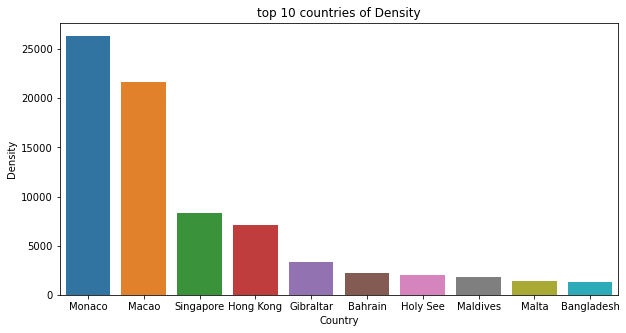

In [149]:
plt.figure(figsize=(10,5))
sns.barplot(x=density['Country'],y=density['Density'],data=density)
plt.title('top 10 countries of Density')

In [83]:
d_density['Country'].head(10)

213        Monaco
166         Macao
113     Singapore
103     Hong Kong
218     Gibraltar
151       Bahrain
234      Holy See
173      Maldives
174         Malta
7      Bangladesh
Name: Country, dtype: object

These are the top countries with highest density. Monacco is having highest density wth 26337P/Km^2.

In [153]:
d_density1=d1.sort_values(by=['Density'])
density1=d_density1.head(10)
density1

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
169,170,Western Sahara,597339,2.55,14876,2.0,266000.0,5582.0,2.4,28.0,87.0,0.01
135,136,Mongolia,3278290,1.65,53123,2.0,1553560.0,-852.0,2.9,28.0,67.0,0.04
54,55,Australia,25499884,1.18,296686,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33
180,181,Iceland,341243,0.65,2212,3.0,100250.0,380.0,1.8,37.0,94.0,NaN
142,143,Namibia,2540905,1.86,46375,3.0,823290.0,-4806.0,3.4,22.0,55.0,0.03
182,183,French Guiana,298682,2.70,7850,4.0,82200.0,1200.0,3.4,25.0,87.0,NaN
38,39,Canada,37742154,0.89,331107,4.0,9093510.0,242032.0,1.5,41.0,81.0,0.48
107,108,Libya,6871292,1.38,93840,4.0,1759540.0,-1999.0,2.3,29.0,78.0,0.09
144,145,Botswana,2351627,2.08,47930,4.0,566730.0,3000.0,2.9,24.0,73.0,0.03
163,164,Guyana,786552,0.48,3786,4.0,196850.0,-6000.0,2.5,27.0,27.0,0.01


Text(0.5, 1.0, 'bottom 10 countries of Density')

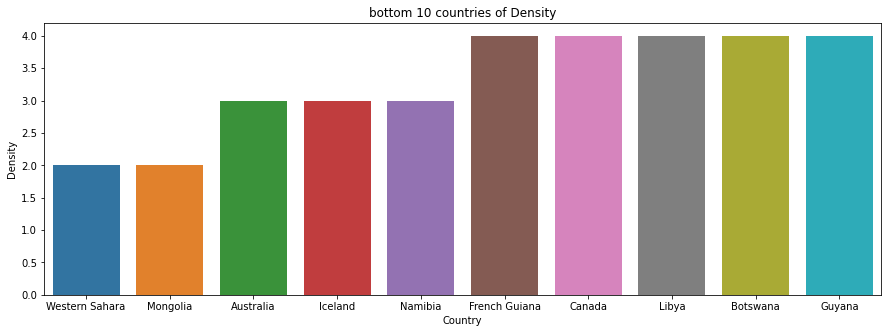

In [155]:
plt.figure(figsize=(15,5))
sns.barplot(x=density1['Country'],y=density1['Density'],data=density1)
plt.title('bottom 10 countries of Density')

In [157]:
d_density1['Country'].head(10)

169    Western Sahara
135          Mongolia
54          Australia
180           Iceland
142           Namibia
182     French Guiana
38             Canada
107             Libya
144          Botswana
163            Guyana
Name: Country, dtype: object

These are the bottom countries with low density.Western sahara is lowest with 2. 

## Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries

In [86]:
d_fert= d1.sort_values(by=['Fertility'],ascending=False)

In [140]:
fert=d_fert.head(10)
fert

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
55,56,Niger,24206644,3.84,895929,19.0,1266700.0,4000.0,7.0,15.0,17.0,0.31
72,73,Somalia,15893222,2.92,450317,25.0,627340.0,-40000.0,6.1,17.0,47.0,0.20
15,16,DR Congo,89561403,3.19,2770836,40.0,2267050.0,23861.0,6.0,17.0,46.0,1.15
59,60,Mali,20250833,3.02,592802,17.0,1220190.0,-40000.0,5.9,16.0,44.0,0.26
71,72,Chad,16425864,3.00,478988,13.0,1259200.0,2000.0,5.8,17.0,23.0,0.21
43,44,Angola,32866272,3.27,1040977,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42
77,78,Burundi,11890784,3.12,360204,463.0,25680.0,2001.0,5.5,17.0,14.0,0.15
6,7,Nigeria,206139589,2.58,5175990,226.0,910770.0,-60000.0,5.4,18.0,52.0,2.64
143,144,Gambia,2416668,2.94,68962,239.0,10120.0,-3087.0,5.3,18.0,59.0,0.03
58,59,Burkina Faso,20903273,2.86,581895,76.0,273600.0,-25000.0,5.2,18.0,31.0,0.27


Text(0.5, 1.0, 'top 10 countries of Fertility')

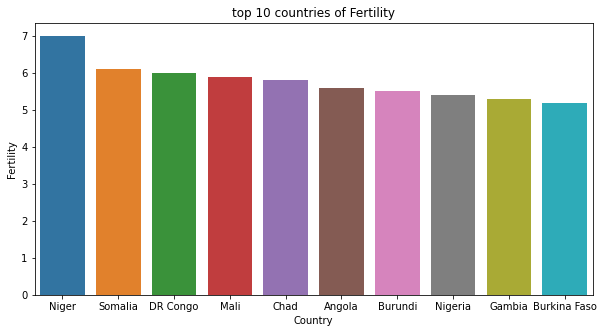

In [142]:
plt.figure(figsize=(10,5))
sns.barplot(x=fert['Country'],y=fert['Fertility'],data=fert)
plt.title('top 10 countries of Fertility')

Niger has highest fertility rate with 7. Along with Niger, Somalia, DR Congo, Mali, Chad, Angola, Burundi, Nigera, Gambia, Burkina Faso are top countries with highest fertility.

In [90]:
d_fert1= d1.sort_values(by=['Fertility'])  # to check lowest fertility

In [143]:
fert1=d_fert1.head(10)
fert1

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
27,28,South Korea,51269185,0.09,43877,527.0,97230.0,11731.0,1.1,44.0,82.0,0.66
56,57,Taiwan,23816775,0.18,42899,673.0,35410.0,30001.0,1.2,42.0,79.0,0.31
166,167,Macao,649335,1.39,8890,21645.0,30.0,5000.0,1.2,39.0,NaN,0.01
113,114,Singapore,5850342,0.79,46005,8358.0,700.0,27028.0,1.2,42.0,NaN,0.08
140,141,Puerto Rico,2860853,-2.47,-72555,323.0,8870.0,-97986.0,1.2,44.0,NaN,0.04
86,87,Greece,10423054,-0.48,-50401,81.0,128900.0,-16000.0,1.3,46.0,85.0,0.13
22,23,Italy,60461826,-0.15,-88249,206.0,294140.0,148943.0,1.3,47.0,69.0,0.78
88,89,Portugal,10196709,-0.29,-29478,111.0,91590.0,-6000.0,1.3,46.0,66.0,0.13
130,131,Moldova,4033963,-0.23,-9300,123.0,32850.0,-1387.0,1.3,38.0,43.0,0.05
134,135,Bosnia and Herzegovina,3280819,-0.61,-20181,64.0,51000.0,-21585.0,1.3,43.0,52.0,0.04


Text(0.5, 1.0, 'bottom 10 countries of Fertility')

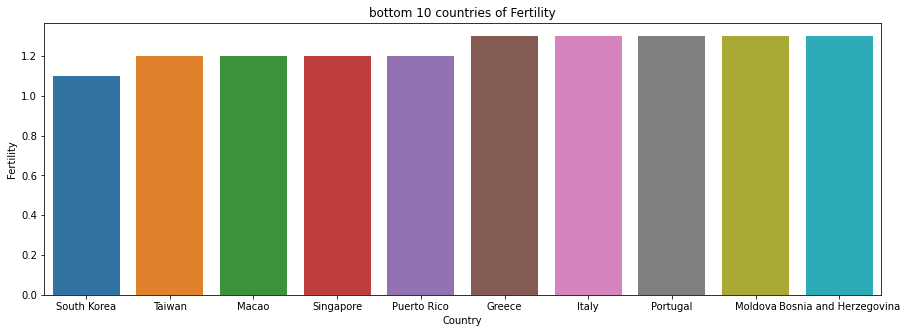

In [145]:
plt.figure(figsize=(15,5))
sns.barplot(x=fert1['Country'],y=fert1['Fertility'],data=fert1)
plt.title('bottom 10 countries of Fertility')

South Korea having lowest fertility with 1.1. Alobg with it, Tawan,Macao,Singapore, Puerto Rico, Greece, Italy, Portugal, Moldova, Bosnia and Herzegovina are having low fertility

## Report top 5 largest countries in this world based on land area.

In [138]:
d_area= d1.sort_values(by='Area',ascending =False)
land=d_area.head()
land

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
8,9,Russia,145934462,0.04,62206,9.0,16376870.0,182456.0,1.8,40.0,74.0,1.87
0,1,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
2,3,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
38,39,Canada,37742154,0.89,331107,4.0,9093510.0,242032.0,1.5,41.0,81.0,0.48
5,6,Brazil,212559417,0.72,1509890,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73


Text(0.5, 1.0, 'top 5 countries of land area')

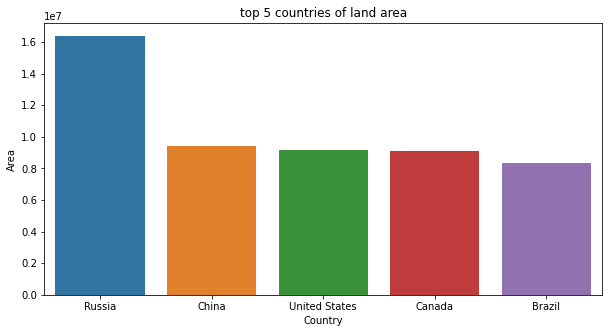

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(x=land['Country'],y=land['Area'],data=land)
plt.title('top 5 countries of land area')

Russia,China, United States, Canada, Brazil are top 5 larget countries in this world based on land area.

## Report top 5 countries in this world based on a median value.

In [158]:
d_median = d1.sort_values(by='Med. Age',ascending=False)
median=d_median.head()
median

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
10,11,Japan,126476461,-0.30,-383840,347.0,364555.0,71560.0,1.4,48.0,92.0,1.62
22,23,Italy,60461826,-0.15,-88249,206.0,294140.0,148943.0,1.3,47.0,69.0,0.78
179,180,Martinique,375265,-0.08,-289,354.0,1060.0,-960.0,1.9,47.0,92.0,NaN
18,19,Germany,83783942,0.32,266897,240.0,348560.0,543822.0,1.6,46.0,76.0,1.07
86,87,Greece,10423054,-0.48,-50401,81.0,128900.0,-16000.0,1.3,46.0,85.0,0.13


Text(0.5, 1.0, 'top 5 countries of median age')

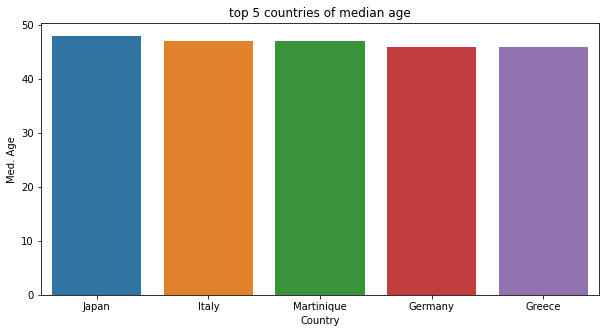

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(y=median['Med. Age'],x=median['Country'],data=median)
plt.title('top 5 countries of median age')

Japan having highest median age with 48. and also Italy,Martinique, Germany,Greece aretop 5 countries  having highest median age.From bar plot also we can see Japan is top.

## Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'dstribution of population')

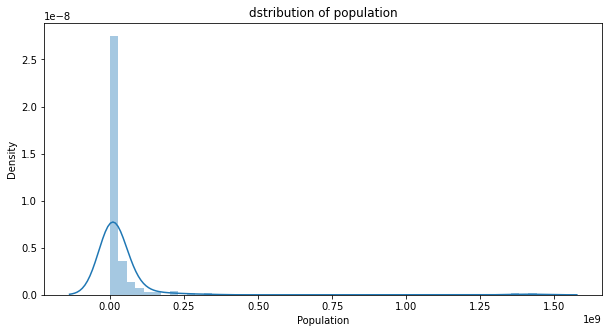

In [116]:
# plot to examine distribution of population
plt.figure(figsize=(10,5))# size of figure
sns.distplot(d1['Population'])
plt.title('dstribution of population')

It shows data is right skewed daa with unimodel.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribution of Mediun age')

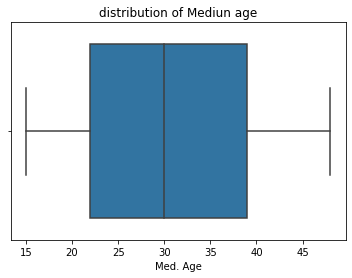

In [117]:
sns.boxplot(d1['Med. Age'])
plt.title('distribution of Mediun age')

Mediun of mediun age is at 30.It shows symmetric data.minimum mediun age of country is 15 & maximun mediun age of country is 45+. Q1 is at ~22 & Q3 is at ~40.It dont have any outliers.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribution of percentage of Urban populaton ')

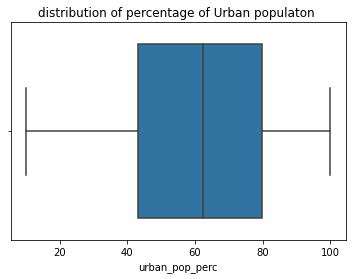

In [118]:
sns.boxplot(d1['urban_pop_perc'])
plt.title('distribution of percentage of Urban populaton ')

Mediun of Urban Population percentage is ~62. Q1 is at ~42 & Q3 is at 80. maximum percentage of urban population is 100. minimum percentage of urban population is <20. It doesn't have outliers.It shows slightly left skewed data.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Yearly change')

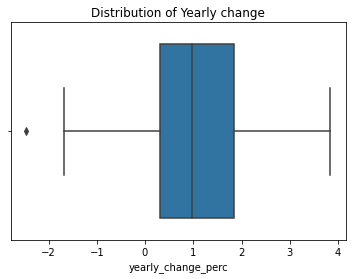

In [163]:
sns.boxplot(d1['yearly_change_perc'])
plt.title('Distribution of Yearly change')

Mediun of yearly change is at 1. It shows slightly right skewd data. minimum value of yearly change is near -2.maximum value of yearly change is at ~4. Q1 is at >0. Q3 is at <2. It has Outlier which is lesser than minimum value.

## Please sort the population column based on the lowest populated countries and report the bottom 10 countries as well as the top 10 countries.

In [164]:
d_pop= d1.sort_values(by='Population',ascending=False)  # highest to lowest

In [165]:
d_pop.head(10)

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
0,1,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,2,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,3,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
5,6,Brazil,212559417,0.72,1509890,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73
6,7,Nigeria,206139589,2.58,5175990,226.0,910770.0,-60000.0,5.4,18.0,52.0,2.64
7,8,Bangladesh,164689383,1.01,1643222,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11
8,9,Russia,145934462,0.04,62206,9.0,16376870.0,182456.0,1.8,40.0,74.0,1.87
9,10,Mexico,128932753,1.06,1357224,66.0,1943950.0,-60000.0,2.1,29.0,84.0,1.65


China is having highest population. Along with that India, UnitesStates, Indonesia, Paakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico are top countries with highest population.

In [166]:
d_pop.tail(10)

,id,Country,Population,yearly_change_perc,net_change,Density,Area,Migrants,Fertility,Med. Age,urban_pop_perc,world_share
225,226,Wallis & Futuna,11239,-1.69,-193,80.0,140.0,NaN,NaN,NaN,NaN,NaN
226,227,Nauru,10824,0.63,68,541.0,20.0,NaN,NaN,NaN,NaN,NaN
227,228,Saint Barthelemy,9877,0.30,30,470.0,21.0,NaN,NaN,NaN,NaN,NaN
228,229,Saint Helena,6077,0.30,18,16.0,390.0,NaN,NaN,NaN,27.0,NaN
229,230,Saint Pierre & Miquelon,5794,-0.48,-28,25.0,230.0,NaN,NaN,NaN,100.0,NaN
230,231,Montserrat,4992,0.06,3,50.0,100.0,NaN,NaN,NaN,10.0,NaN
231,232,Falkland Islands,3480,3.05,103,NaN,12170.0,NaN,NaN,NaN,66.0,NaN
232,233,Niue,1626,0.68,11,6.0,260.0,NaN,NaN,NaN,46.0,NaN
233,234,Tokelau,1357,1.27,17,136.0,10.0,NaN,NaN,NaN,NaN,NaN
234,235,Holy See,801,0.25,2,2003.0,NaN,NaN,NaN,NaN,NaN,NaN


Holy See is having lowest population. Along with that, Tokelau, Niue, Falland Islands, Montserrat, Saint Pierre & Miquelon, Saint Helena, saint Barthelemy, Nauru, Wallis & Futuna are having lowest population.

## Conclusion:
We Scrape population data from worldometer webpage through requests & beautiful soup libries.Using pandas and for loop create data frame from html page data.we did basic exploration of data by finding number of rows, number of columns, datatypes, missing values. We clean data by changing datatypes while removing charecters in data & replace N.A values with np.NaN. we renamed columns with suitable names. we sorted values using density, mediun age, population, land area, fertility rate and find top & bottom countries using visualization & sortvalues() method. We examine distribution of population,mediun age, yearly change, urban population percentage using plots.

**Author**: Harsha Veena

**Created on** : 14/6/2022

**IDE**:Jupyter Notebook

**Purpose** : Advance Python Project

**Libraries Used**: requests, Beautifulsoup,numpy,pandas,seaborn,matplotlib.pyplot

# Part 2
Create the following class with the given attributes and methods;

1. Standard -
Attributes: Std name, No of enrolled students, Overall GPA
Methods: getStd, getEnrolled, getOGPA

2. Students class with Standard as its super class  - 
Attributes: Name,Roll No., Standard, Math marks, English Marks, Science Marks, Social Marks
Methods: getName, getRollNo, getStd, getGPA

3. Explanation:
getName, getRollNo, getStd methods should give the name, roll number and standard of the student. 
getGPA should give the average marks of math, english, science and social marks scaled to 10-points. The same applies to all the attributes and methods in the Standard superclass.

In [7]:
import numpy as np

In [8]:
class standard:     # super class
    count=0

    gpa=[]     # empty list to store gpa of each instance
    def __init__(self,std,name,rollno,math,eng,sci,soc):
        self.std=std
        self.name= name
        self.rollno=rollno
        self.math =math
        self.eng=eng
        self.sci =sci
        self.soc= soc
        self.m=math/10  # credits as marks/10(89/10=8.9 credits)
        self.e=eng/10
        self.s1=sci/10
        self.s2=soc/10
        standard.count=standard.count+1
        # for number of enrolled students
        # calculate GPA for each instance
        self.GPA=((self.math*self.m)+(self.eng*self.e)+(self.sci*self.s1)+(self.soc*self.s2))/(self.math+self.eng+self.sci+self.soc)
        self.gpa.append(self.GPA)# gpa appended to list to calculate OGPA
    def getStd(self):                    # method
        return self.std              # return std value
    def getEnrolled(self):               # method
        print('number of students',self.count)# print number of instances
        return self.count
    
    def getOGPA(self):    # overall GPA, mean of all instances of GPA
        print(self.gpa,self.count)  # GPAs with total number of students count
        getOGPA=np.mean(self.gpa)     # mean of GPA
        return round(getOGPA,1)   # rounded value
        

In [9]:
class student(standard):   # child class with parent standard
    
    def __init__(self,std,name,rollno,math,eng,sci,soc):   # atributes initialization
        standard.__init__(self,std,name,rollno,math,eng,sci,soc)   # properties pass from standard
        

    def getName(self):
        return self.name
        
    def getRollNo(self):
        return self.rollno
    def getStd(self):
        return self.std
    def getGPA(self):  # calculate gpa
        GPA=((self.math*self.m)+(self.eng*self.e)+(self.sci*self.s1)+(self.soc*self.s2))/(self.math+self.eng+self.sci+self.soc)
        print(self.name,'GPA is ',GPA)
        return round(GPA,1)
    

In [10]:
a1=standard(2,'harsha',1,99,89,79,69)  # instancec for standard
a2=standard(2,'veena',2,45,67,89,45)
print(a1.getStd(),a1.getEnrolled())

number of students 2
2 2


In [11]:
s1=student(3,'hv',3,45,67,89,54)  # instance for student
print(s1.getGPA(),s1.getName(),s1.getRollNo(),s1.getStd())

hv GPA is  6.8043137254901955
6.8 hv 3 3


In [12]:
s2=student(4,'hveena',4,65,87,49,74)
print(s2.getGPA(),s2.getName(),s2.getRollNo(),s2.getStd())

hveena GPA is  7.153090909090909
7.2 hveena 4 4


In [13]:
a1.__dict__

{'std': 2,
 'name': 'harsha',
 'rollno': 1,
 'math': 99,
 'eng': 89,
 'sci': 79,
 'soc': 69,
 'm': 9.9,
 'e': 8.9,
 's1': 7.9,
 's2': 6.9,
 'GPA': 8.548809523809524}

In [14]:
a2.__dict__

{'std': 2,
 'name': 'veena',
 'rollno': 2,
 'math': 45,
 'eng': 67,
 'sci': 89,
 'soc': 45,
 'm': 4.5,
 'e': 6.7,
 's1': 8.9,
 's2': 4.5,
 'GPA': 6.691056910569106}

In [15]:
s1.__dict__

{'std': 3,
 'name': 'hv',
 'rollno': 3,
 'math': 45,
 'eng': 67,
 'sci': 89,
 'soc': 54,
 'm': 4.5,
 'e': 6.7,
 's1': 8.9,
 's2': 5.4,
 'GPA': 6.8043137254901955}

In [16]:
s2.__dict__

{'std': 4,
 'name': 'hveena',
 'rollno': 4,
 'math': 65,
 'eng': 87,
 'sci': 49,
 'soc': 74,
 'm': 6.5,
 'e': 8.7,
 's1': 4.9,
 's2': 7.4,
 'GPA': 7.153090909090909}

In [17]:
print(s1.getGPA(),s2.getGPA())

hv GPA is  6.8043137254901955
hveena GPA is  7.153090909090909
6.8 7.2


In [18]:
print(a1.getOGPA())

[8.548809523809524, 6.691056910569106, 6.8043137254901955, 7.153090909090909] 4
7.3


7.3 is the overall GPA of all enrolled students.

In [19]:
print(a1.getEnrolled())

number of students 4
4


# Conclusion:
We created 2 classes of standard & student. standard is super class & student is its child class. We passed properties of standard to student through inheritance. we calculated number of enrolled students as finding the count of number of instances created.we calculated gpa of each student stored & append to list. with that we caculated overall GPA of all students enrolled.